<a href="https://colab.research.google.com/github/sebastianopazo1/Chapter-9-Deep-Learning-Public/blob/main/Copia_de_capas_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Código para mostar capas internas de una red convolucional

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Se importan las librerías y el modelo de la red que se emplea, indicandose la capas y los parámetros que posee.

In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
root_path = Path.cwd()
model = keras.models.load_model(
 f"/content/drive/MyDrive/Cap 9 Machine Learning/modelo_cap_9_cnn.keras")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                             

Se importa la foto de "thea" la cual se utiliza para la demostración, en la red ya entrenada con el dataset cat-vs-dogs.

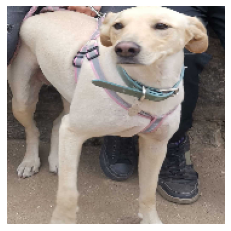

1/1 [==============================] - 7s 7s/step
Es un perro con una probabilidad de  99.90116357803345 %


In [ ]:
img_path = f'/content/drive/MyDrive/Cap 9 Machine Learning/thea.jpg'

def get_img_array(img_path, target_size):
    img = keras.utils.load_img(
    img_path, target_size=target_size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array
img_tensor_1 = get_img_array(img_path, target_size=(180, 180))
plt.axis("off")
plt.imshow(img_tensor_1[0].astype("uint8"))
plt.show()#Se plotea la imagen de entrada 

prediction = model.predict(img_tensor_1)#Se clasifica la prediction como perro o gato dependiendo del valor esta
if(np.round(prediction)==1):
    print("Es un perro con una probabilidad de ", float(prediction)*100, "%")
else:
    print("Es un gato con probabilidad de: ", abs(float(prediction)-1)*100, "%")


Se verifica que "thea" es un perro en base al entrenamiento de la red

Por otra parte se realiza el mismo procedimiento pero para "isis", la cual debe de reconocerse en la clase gato

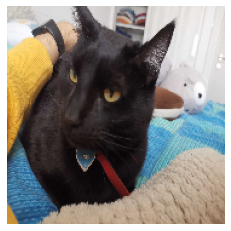

1/1 [==============================] - 0s 19ms/step
Es un gato con probabilidad de:  98.94275655969977 %


In [ ]:
img_path = f'/content/drive/MyDrive/Cap 9 Machine Learning/isis.jpg'

def get_img_array(img_path, target_size):
    img = keras.utils.load_img(
    img_path, target_size=target_size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array
img_tensor_2 = get_img_array(img_path, target_size=(180, 180))
plt.axis("off")
plt.imshow(img_tensor_2[0].astype("uint8"))
plt.show()#Se plotea la imagen de entrada 
prediction = model.predict(img_tensor_2)#Aquí se puede clasificar a isis como gato o perro dependiendo del valor que se le asigne
if(np.round(prediction)==1):
    print("Es un perro con una probabilidad de ", float(prediction)*100, "%")
else:
    print("Es un gato con probabilidad de: ", abs(float(prediction)-1)*100, "%")


Se verifica que "isis" es un perro en base al entrenamiento de la red

In [ ]:
from tensorflow.keras import layers
layer_outputs = []
layer_names = []
for layer in model.layers:
 if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
    layer_outputs.append(layer.output)
    layer_names.append(layer.name)
    activation_model = keras.Model(inputs=model.input, outputs=layer_outputs)
activations_dog = activation_model.predict(img_tensor_1)

1/1 [==============================] - 0s 98ms/step


A continuación se puede mostar la primera capa de activación, la cual se comporta como un filtro.

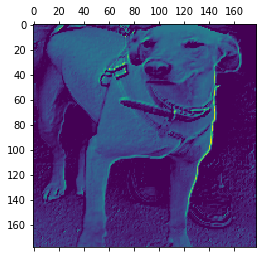

In [ ]:
first_layer_activation = activations_dog[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap="viridis")

Ahora bien se procede a mostrar una mayor cantidad de capas de activación en distintas profundidades de la red convolucional, en donde al comienzo se puede distinguir la imagen de entrada y los filtros que se le aplican, pero a medida que se profundiza en la red, se agrupan características las cuales son  mas abstractas para el ojo humano, donde estas pueden parecer cualquier cosa, pero contiene la información importante de la imagen de entrada.

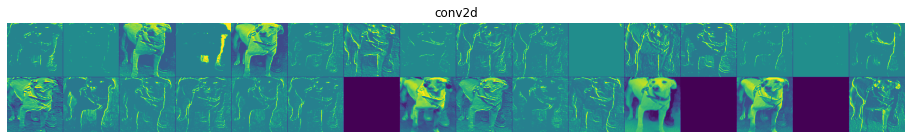

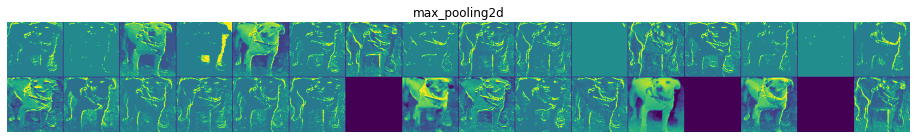

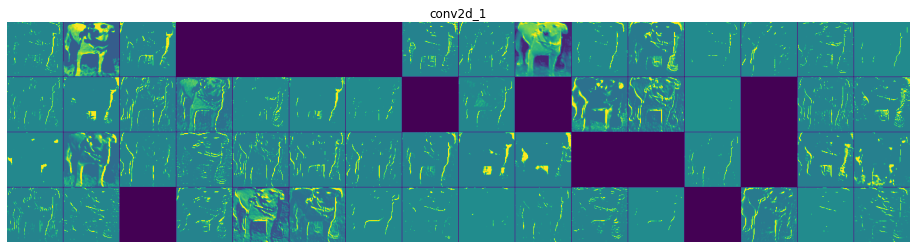

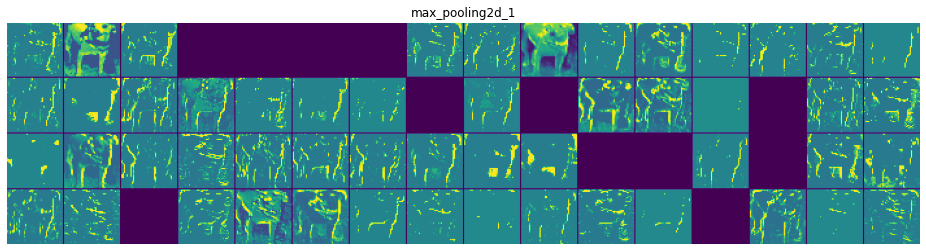

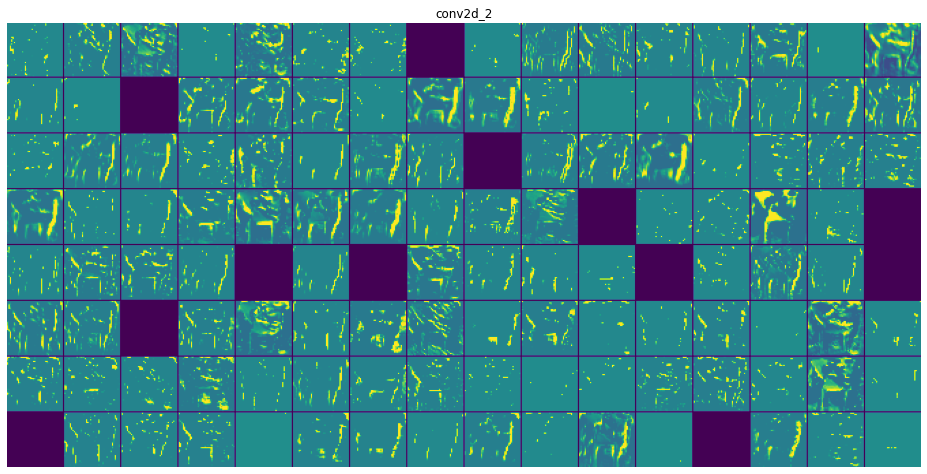

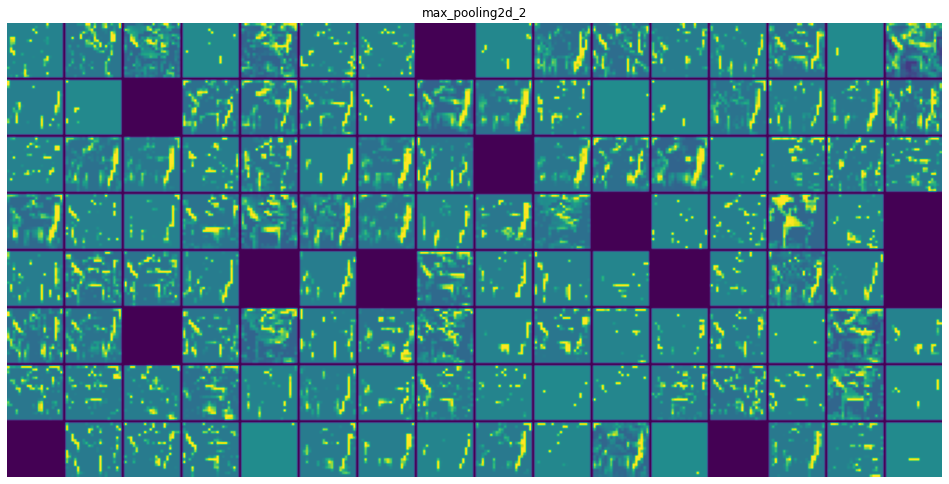

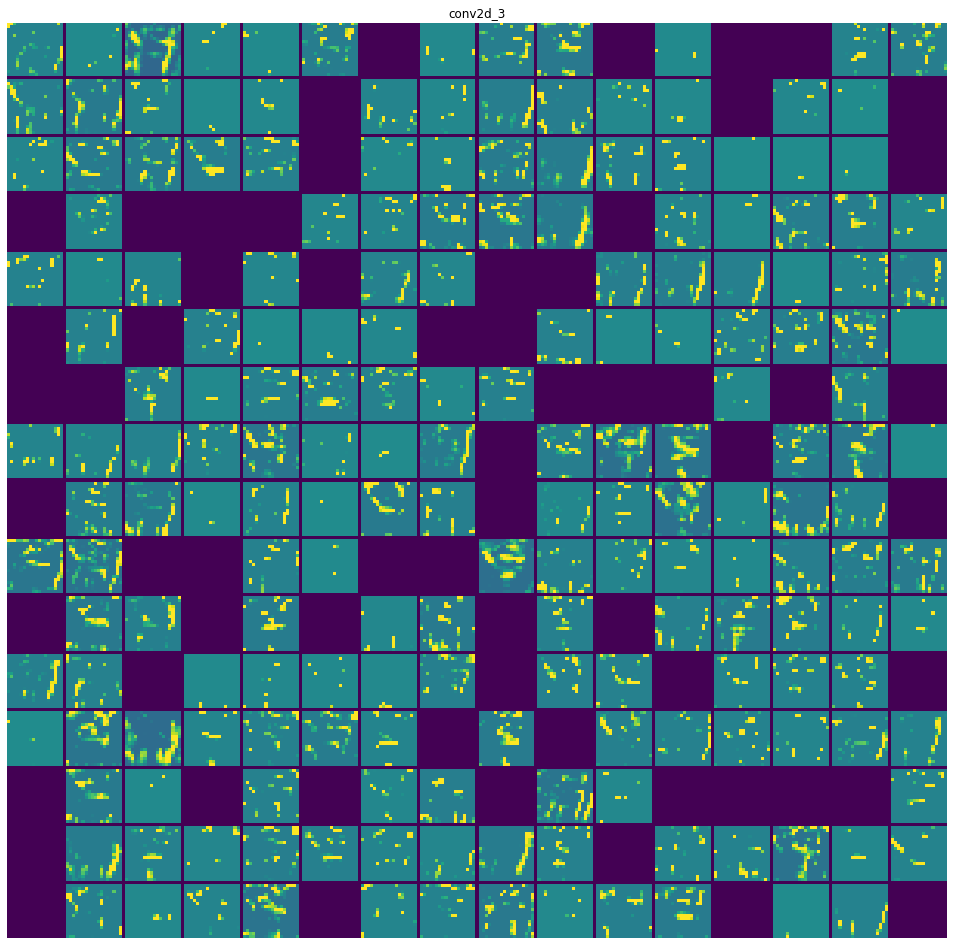

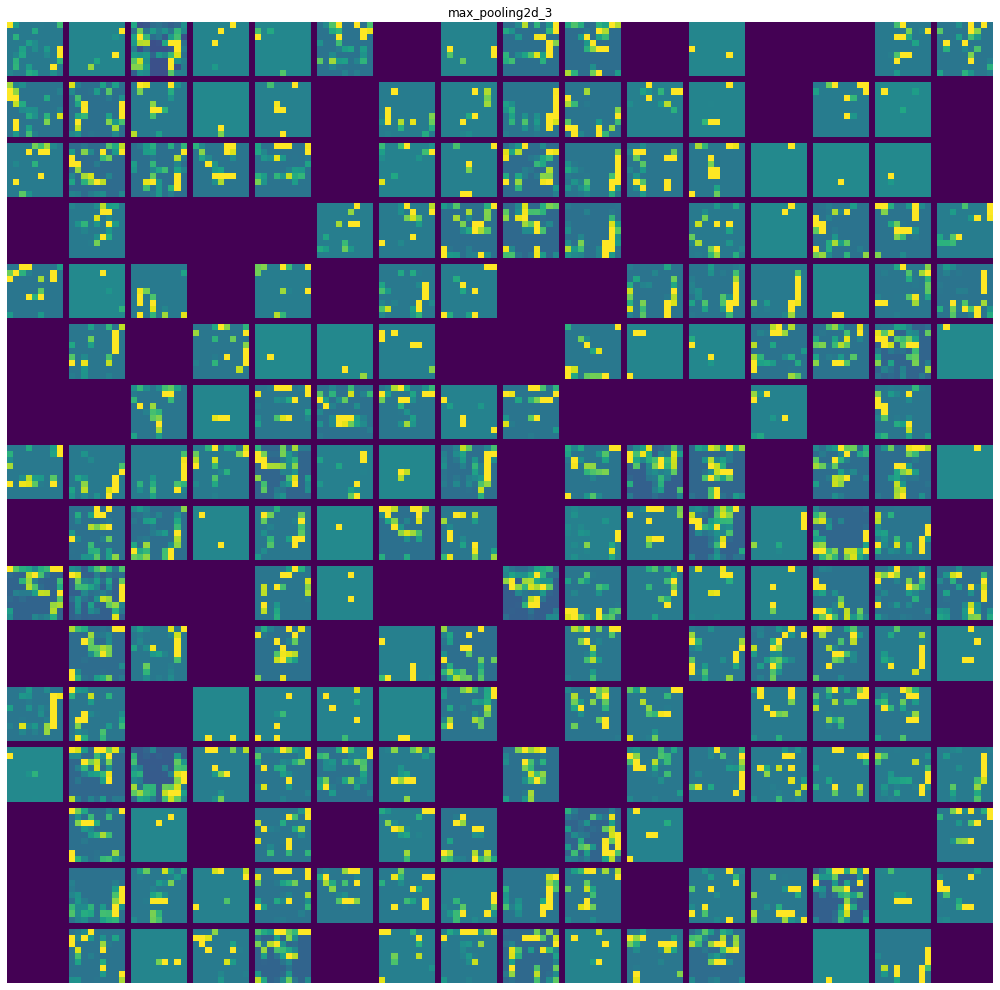

In [ ]:
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations_dog):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros(((size + 1) * n_cols - 1,
    images_per_row * (size + 1) - 1))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_index = col * images_per_row + row
            channel_image = layer_activation[0, :, :, channel_index].copy()
            if channel_image.sum() != 0:
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype("uint8")
                display_grid[
                col * (size + 1): (col + 1) * size + col,
                row * (size + 1) : (row + 1) * size + row] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
    scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.axis("off")
    plt.imshow(display_grid, aspect="auto", cmap="viridis") 

Se muestran las mismas características de la imagen de "thea", la cual fue clasificada como "perro" para "isis" quién fue clasificada como "gato" según la red convolucional.

In [ ]:
from tensorflow.keras import layers
layer_outputs = []
layer_names = []
for layer in model.layers:
 if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
    layer_outputs.append(layer.output)
    layer_names.append(layer.name)
    activation_model = keras.Model(inputs=model.input, outputs=layer_outputs)
activations_cat = activation_model.predict(img_tensor_2)

1/1 [==============================] - 0s 69ms/step


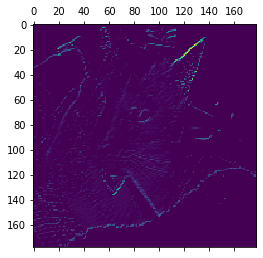

In [ ]:
first_layer_activation = activations_cat[0]
plt.matshow(first_layer_activation[0, :, :, 5], cmap="viridis")


Aquí se realiza el mismo proceso que para "thea", mostrando el resultado de filtrar  la imagen a distintas "profundidades" de la red convolucional

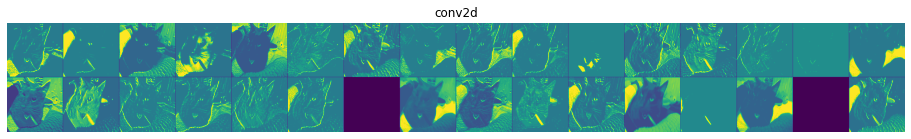

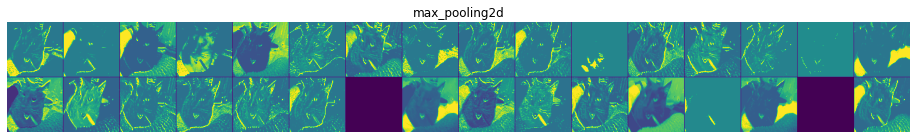

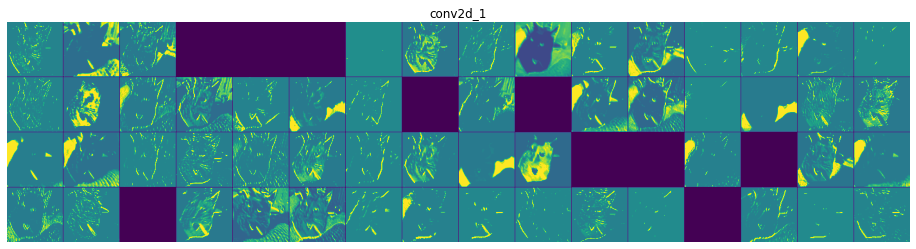

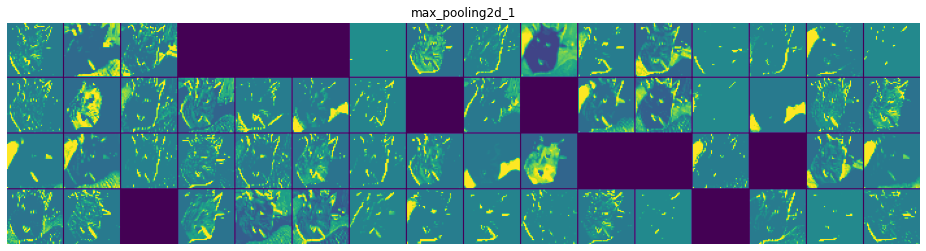

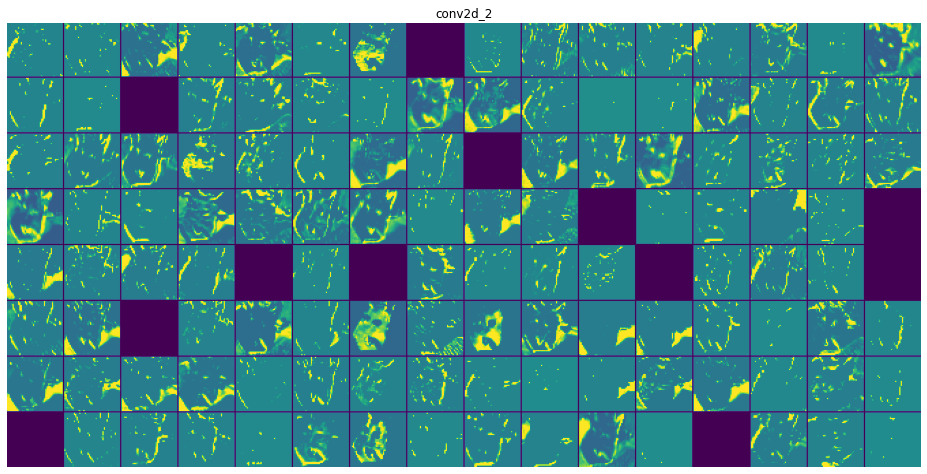

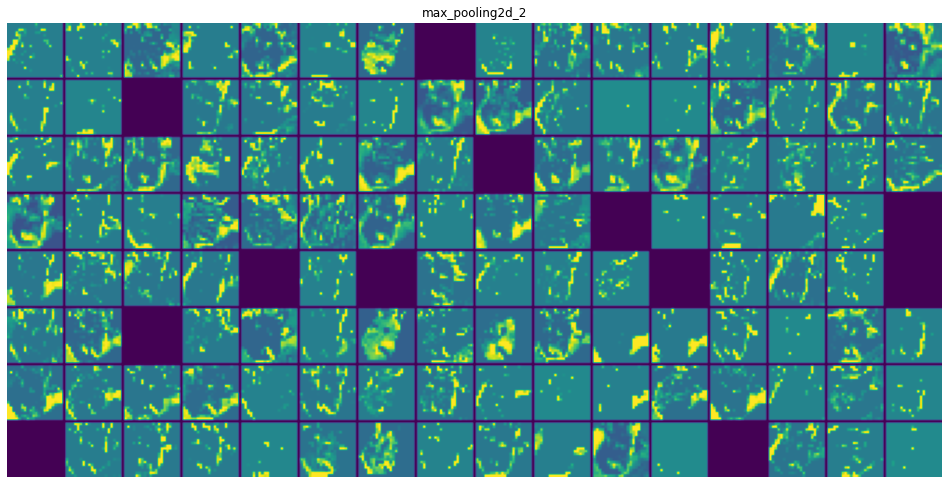

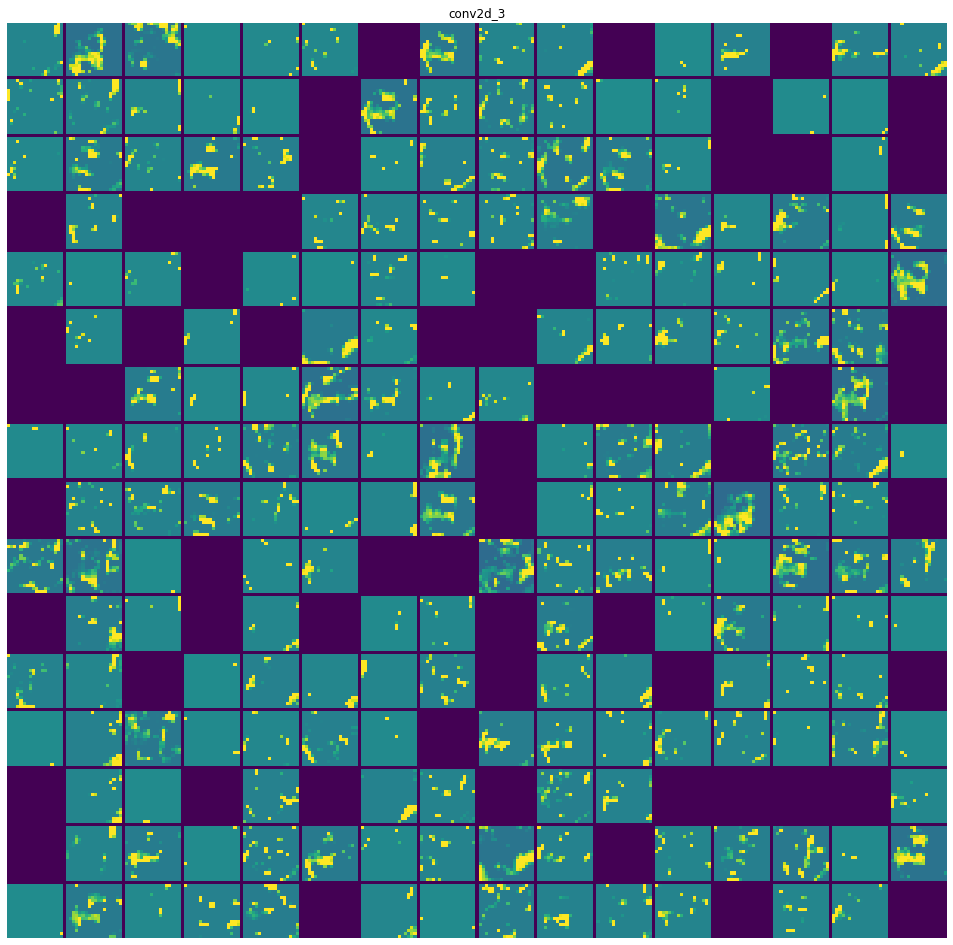

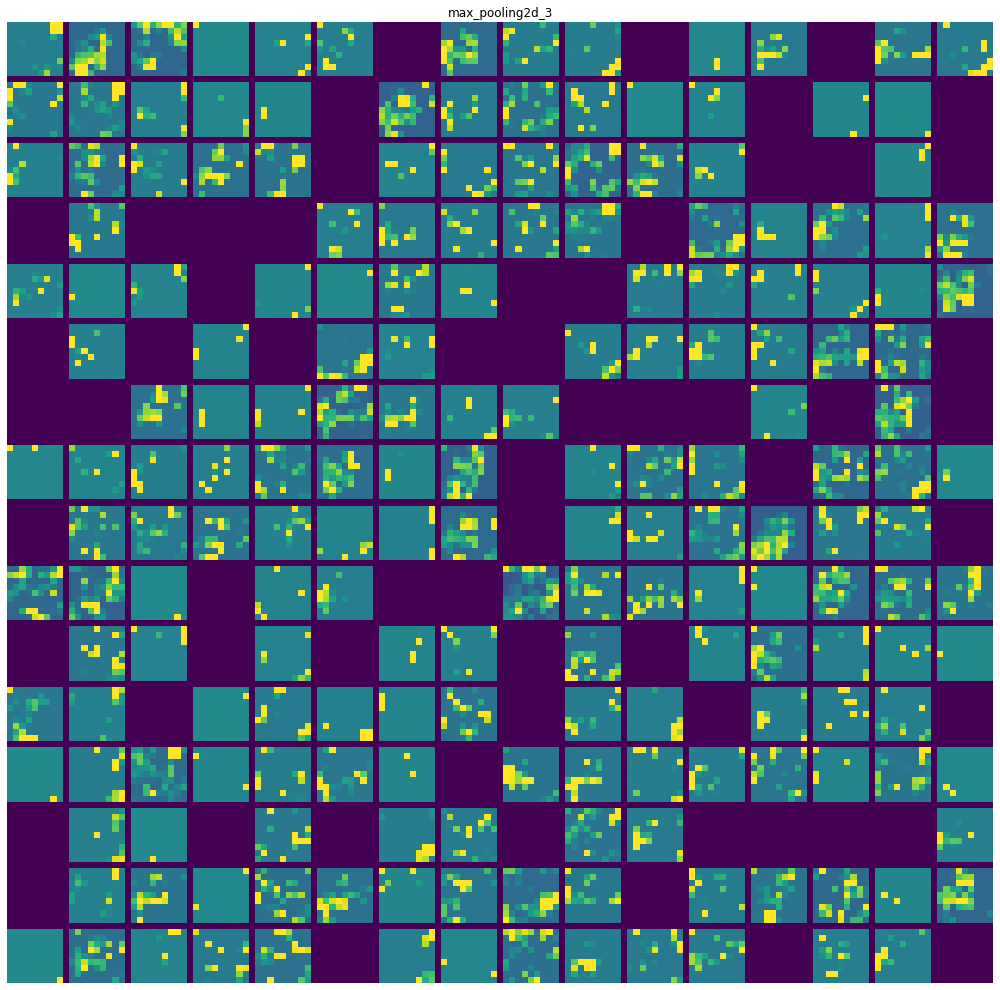

In [ ]:
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations_cat):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros(((size + 1) * n_cols - 1,
    images_per_row * (size + 1) - 1))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_index = col * images_per_row + row
            channel_image = layer_activation[0, :, :, channel_index].copy()
            if channel_image.sum() != 0:
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype("uint8")
                display_grid[
                col * (size + 1): (col + 1) * size + col,
                row * (size + 1) : (row + 1) * size + row] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
    scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.axis("off")
    plt.imshow(display_grid, aspect="auto", cmap="viridis") 